# EigenGAN

#### Margarita Savova

### Setup

In [ ]:
%matplotlib inline

In [ ]:
!pip install keras_applications

     |████████████████████████████████| 51kB 2.6MB/s 


In [ ]:
!pip install keras_vggface

In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-nryrtab8
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-nryrtab8
     |████████████████████████████████| 1.0MB 5.7MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.067b315b6bfa13cf6f6d42d4c9fdecc7fa1502c04_-cp37-none-any.whl size=147327 sha256=1608a4841ec15b3a81ff4163a0c88296cb89a1c7bbe3604f892a4df3d79572c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-l7bas1hk/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
import glob
import imageio
import PIL
from PIL import Image
import os, os.path
import imghdr
import time
import gc

import cv2

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import TensorBoard

from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from keras.preprocessing import image

from keras import backend as BK

###Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
BASE_DIR_images = os.path.abspath("/content/gdrive/MyDrive/images1024x1024")

In [ ]:
BASE_DIR_thumbnails = os.path.abspath("/content/gdrive/MyDrive/thumbnails128x128")

In [ ]:
dirs_images = os.listdir(BASE_DIR_images)
print(dirs_images)

['LICENSE.txt', '00000', '01000', '02000', '03000', '04000', '05000', '06000', '07000', '08000', '09000', '10000', '11000', '12000', '13000', '14000', '15000', '16000', '17000', '18000', '19000', '20000', '21000', '22000', '23000', '24000', '25000', '26000', '27000', '28000', '29000', '30000', '31000', '32000', '33000', '34000', '35000', '36000', '37000', '38000', '39000', '40000', '41000', '42000', '43000', '44000', '45000', '46000', '47000', '48000', '49000', '50000', '51000', '52000', '53000', '54000', '55000', '56000', '57000', '58000', '59000', '60000', '61000', '62000', '63000', '64000', '65000', '66000', '67000', '68000', '69000']


In [ ]:
dirs_images.remove('LICENSE.txt')

In [ ]:
print(dirs_images)

['00000', '01000', '02000', '03000', '04000', '05000', '06000', '07000', '08000', '09000', '10000', '11000', '12000', '13000', '14000', '15000', '16000', '17000', '18000', '19000', '20000', '21000', '22000', '23000', '24000', '25000', '26000', '27000', '28000', '29000', '30000', '31000', '32000', '33000', '34000', '35000', '36000', '37000', '38000', '39000', '40000', '41000', '42000', '43000', '44000', '45000', '46000', '47000', '48000', '49000', '50000', '51000', '52000', '53000', '54000', '55000', '56000', '57000', '58000', '59000', '60000', '61000', '62000', '63000', '64000', '65000', '66000', '67000', '68000', '69000']


In [ ]:
dirs_thumbnails = os.listdir(BASE_DIR_thumbnails)
dirs_thumbnails.remove('LICENSE.txt')
print(dirs_thumbnails)

['00000', '01000', '02000', '03000', '04000', '05000', '06000', '07000', '08000', '09000', '10000', '11000', '12000', '13000', '14000', '15000', '16000', '17000', '18000', '19000', '20000', '21000', '22000', '23000', '24000', '25000', '26000', '27000', '28000', '29000', '30000', '31000', '32000', '33000', '34000', '35000', '36000', '37000', '38000', '39000', '40000', '41000', '42000', '43000', '44000', '45000', '46000', '47000', '48000', '49000', '50000', '51000', '52000', '53000', '54000', '55000', '56000', '57000', '58000', '59000', '60000', '61000', '62000', '63000', '64000', '65000', '66000', '67000', '68000', '69000']


In [ ]:
filenames_images = []
for i in dirs_images:
  for image in os.listdir(os.path.join(BASE_DIR_images, i)):
    filenames_images.append(image)

In [ ]:
len(filenames_images)

70000

In [ ]:
filenames_images[0]

'00000.png'

In [ ]:
filenames_thumbnails = []
for i in dirs_thumbnails:
  for image in os.listdir(os.path.join(BASE_DIR_thumbnails, i)):
    filenames_thumbnails.append(image)

In [ ]:
len(filenames_thumbnails)

70000

In [ ]:
filenames_thumbnails[0]

'00000.png'

###Images for training

In [ ]:
# reading images for training

train_images = []
for num, i in enumerate(dirs_images):
  if num >= 35:
    for image in os.listdir(os.path.join(BASE_DIR_images, i)):
      result_file = tf.io.read_file(os.path.join(BASE_DIR_images, i, image))
      result_image = tf.image.decode_image(result_file)
      result_image = tf.image.resize(result_image, (224, 224))
      result_image = tf.dtypes.cast(result_image, tf.uint8)
      train_images.append(result_image)
      if len(train_images) == 1024:
        break
    else:
      continue
    break

In [ ]:
# len(train_images)

1024

I am running the following code twice more to extract two more batches of 1024 pictures each and append them to the train images.

In [ ]:
# reading images for training

train_images_third = []
for num, i in enumerate(dirs_images):
  if num >= 42:
    for image in os.listdir(os.path.join(BASE_DIR_images, i)):
      result_file = tf.io.read_file(os.path.join(BASE_DIR_images, i, image))
      result_image = tf.image.decode_image(result_file)
      result_image = tf.image.resize(result_image, (224, 224))
      result_image = tf.dtypes.cast(result_image, tf.uint8)
      train_images_third.append(result_image)
      if len(train_images_third) == 1024:
        break
    else:
      continue
    break

In [ ]:
len(train_images_third)

1024

In [ ]:
train_images.extend(train_images_third)

In [ ]:
len(train_images)

3072

In [ ]:
del train_images_third

In [ ]:
gc.collect()

88

####Exploring the dataset

In [ ]:
train_images[0]

<tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[229, 192, 139],
        [230, 189, 133],
        [225, 188, 134],
        ...,
        [221, 171, 110],
        [222, 171, 115],
        [219, 168, 113]],

       [[227, 194, 142],
        [229, 192, 139],
        [227, 190, 139],
        ...,
        [219, 169, 107],
        [224, 174, 115],
        [219, 168, 110]],

       [[233, 199, 145],
        [230, 193, 141],
        [229, 193, 134],
        ...,
        [227, 171, 116],
        [218, 167, 106],
        [219, 169, 108]],

       ...,

       [[ 16,  50, 116],
        [ 19,  52, 119],
        [ 17,  50, 118],
        ...,
        [163, 195, 235],
        [169, 225, 247],
        [ 59, 114, 176]],

       [[ 19,  53, 119],
        [ 17,  50, 119],
        [ 14,  48, 111],
        ...,
        [ 27,  57, 122],
        [117, 138, 187],
        [223, 247, 252]],

       [[ 17,  55, 126],
        [ 12,  48, 118],
        [  9,  42, 106],
        ...,
        [ 15,  48, 11

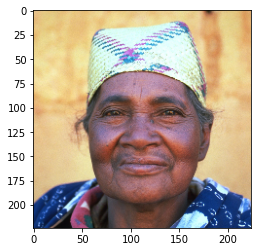

In [ ]:
plt.imshow(train_images[0])

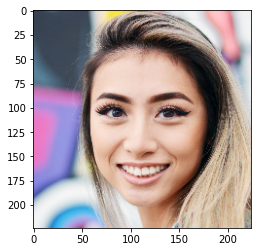

In [ ]:
plt.imshow(train_images[1000])

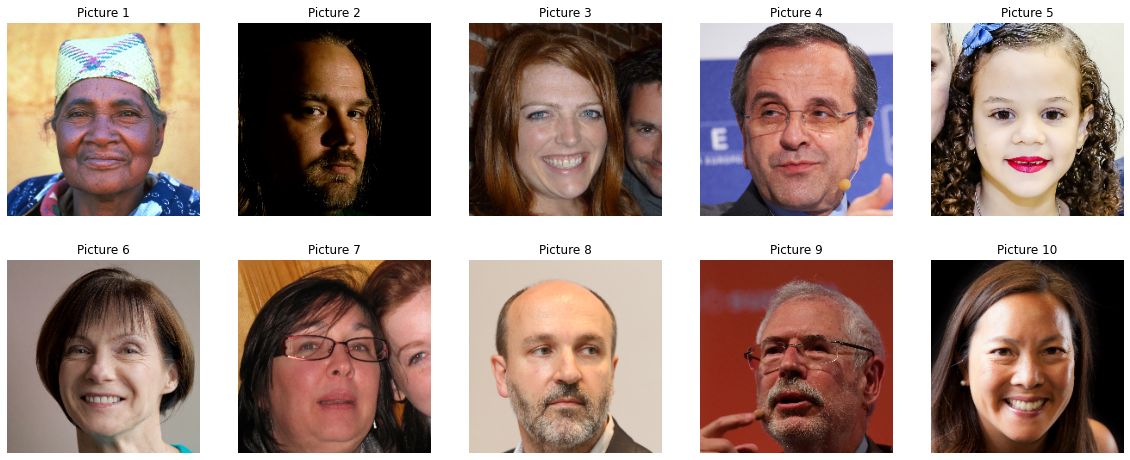

In [ ]:
fig_train = plt.figure(figsize = (20, 8))
for j in range(10):
    a = fig_train.add_subplot(2, 5, j+1)
    imgplot = plt.imshow(train_images[j])
    a.set_title(f'Picture {j+1}')
    plt.axis("off")

####Preprocessing

In [ ]:
train_images = utils.preprocess_input(tf.cast(train_images, dtype=tf.float32))

In [ ]:
len(train_images)

3072

In [ ]:
train_images[0]

array([[[  45.406   ,   87.2376  ,   99.813705],
        [  39.406   ,   84.2376  ,  100.813705],
        [  40.406   ,   83.2376  ,   95.813705],
        ...,
        [  16.405998,   66.2376  ,   91.813705],
        [  21.405998,   66.2376  ,   92.813705],
        [  19.405998,   63.237602,   89.813705]],

       [[  48.406   ,   89.2376  ,   97.813705],
        [  45.406   ,   87.2376  ,   99.813705],
        [  45.406   ,   85.2376  ,   97.813705],
        ...,
        [  13.405998,   64.2376  ,   89.813705],
        [  21.405998,   69.2376  ,   94.813705],
        [  16.405998,   63.237602,   89.813705]],

       [[  51.406   ,   94.2376  ,  103.813705],
        [  47.406   ,   88.2376  ,  100.813705],
        [  40.406   ,   88.2376  ,   99.813705],
        ...,
        [  22.405998,   66.2376  ,   97.813705],
        [  12.405998,   62.237602,   88.813705],
        [  14.405998,   64.2376  ,   89.813705]],

       ...,

       [[  22.405998,  -54.762398, -113.186295],
        [  

In [ ]:
train_images = tf.stack(train_images, axis=0)

In [ ]:
train_images.shape

TensorShape([3072, 224, 224, 3])

In [ ]:
BUFFER_SIZE = 3072
BATCH_SIZE = 32

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
train_dataset

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
train_path = os.path.abspath("/content/gdrive/MyDrive/Datasets/EigenGAN/train")

In [ ]:
tf.data.experimental.save(train_dataset, train_path)

In [ ]:
# reading the saved dataset

# train_dataset = tf.data.experimental.load(train_path, tf.TensorSpec(shape=(32, 224, 224, 3), dtype=tf.float32))
# for elem in new_dataset:
#   print(elem)
#   break

###Eigenfaces

In [ ]:
eigen_images = []
for i in dirs_thumbnails:
  for image in os.listdir(os.path.join(BASE_DIR_thumbnails, i)):
    result_file = tf.io.read_file(os.path.join(BASE_DIR_thumbnails, i, image))
    result_image = tf.image.decode_image(result_file)
    result_image = tf.image.resize(result_image, (56, 56))
    result_image = tf.dtypes.cast(result_image, tf.uint8)
    eigen_images.append(result_image)
    if len(eigen_images) == 3072:
      break
  else:
    continue
  break

In [ ]:
eigenfaces_path = os.path.join("/content/gdrive/MyDrive/Datasets/EigenGAN/eigenfaces/", "eigenfaces.npy")

In [ ]:
np.save(eigenfaces_path, eigen_images)

In [ ]:
# Opening saved eigenfaces

# eigen_images = np.load(eigenfaces_path)

In [ ]:
# eigen_images.shape

(3072, 56, 56, 3)

In [ ]:
len(eigen_images)

3072

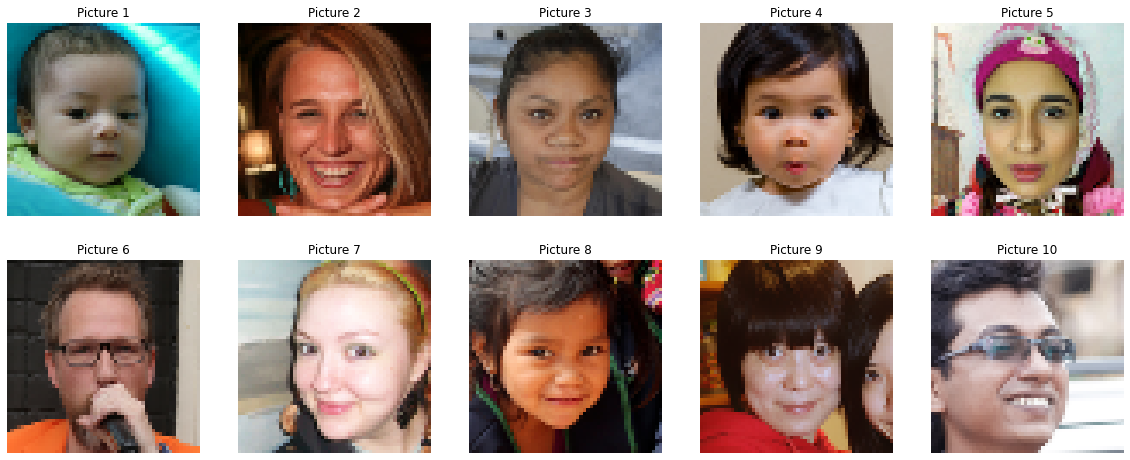

In [ ]:
fig_eigen = plt.figure(figsize = (20, 8))
for j in range(10):
    a = fig_eigen.add_subplot(2, 5, j+1)
    imgplot = plt.imshow(eigen_images[j])
    a.set_title(f'Picture {j+1}')
    plt.axis("off")